In [1]:
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn import svm, metrics
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

<h1/>Digits<h1>

In [2]:
digits_dataset=load_digits()
print(digits_dataset['DESCR'][:1000]+'\n...')

.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 1797
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each blo

2     Разделите данные на обучающий и тестовые наборы

In [3]:
X_train, X_test, y_train, y_test=train_test_split(digits_dataset['data'], digits_dataset['target'], random_state=0)
print("{}".format(X_train.shape))
print("{}".format(y_train.shape))

(1347, 64)
(1347,)


In [4]:
print("{}".format(X_test.shape))
print("{}".format(y_test.shape))

(450, 64)
(450,)


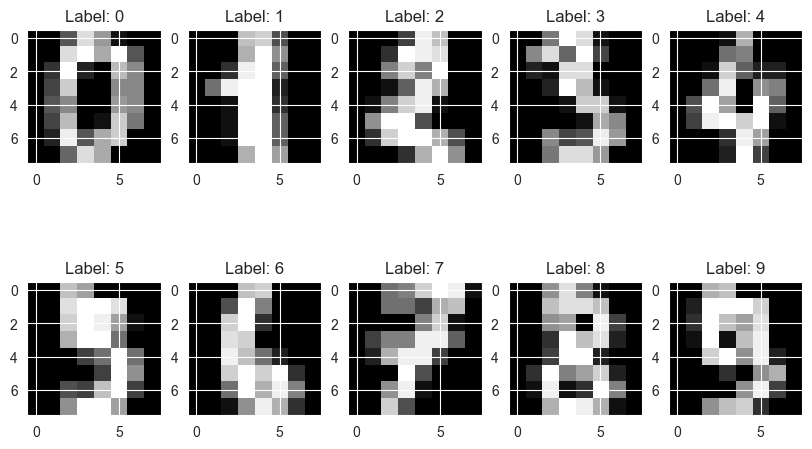

In [5]:
clf = svm.SVC(gamma=0.001)
clf.fit(X_train, y_train)
predicted=clf.predict(X_test)

digits=load_digits()
fig, axes = plt.subplots(2, 5, figsize=(10, 6))
for i, ax in enumerate(axes.ravel()):
    ax.imshow(digits.images[i], cmap='gray')
    ax.set_title(f'Label: {digits.target[i]}')
plt.show()

In [6]:
print(
    f"Основные показатели классификации {clf}:\n"
    f"{metrics.classification_report(y_test, predicted)}\n"
)

Основные показатели классификации SVC(gamma=0.001):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        37
           1       1.00      1.00      1.00        43
           2       1.00      1.00      1.00        44
           3       1.00      1.00      1.00        45
           4       1.00      1.00      1.00        38
           5       0.98      0.98      0.98        48
           6       1.00      1.00      1.00        52
           7       1.00      1.00      1.00        48
           8       1.00      1.00      1.00        48
           9       0.98      0.98      0.98        47

    accuracy                           1.00       450
   macro avg       1.00      1.00      1.00       450
weighted avg       1.00      1.00      1.00       450




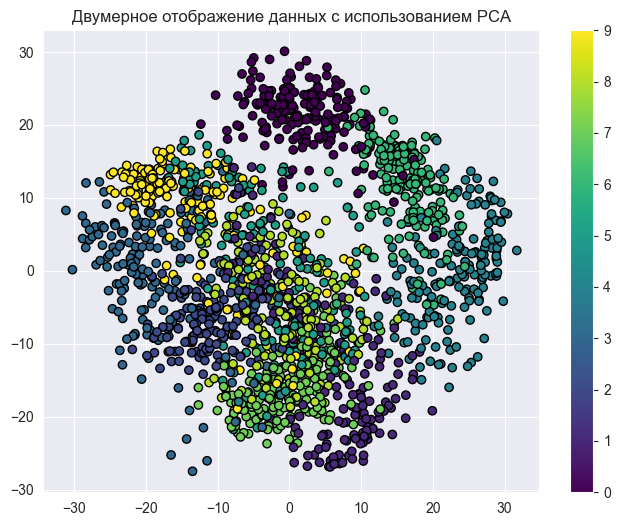

In [7]:
digits = load_digits()

# Примените метод главных компонент (PCA)
pca = PCA(n_components=2)
transformed_data = pca.fit_transform(digits.data)

# Отобразите данные в двумерном пространстве
plt.figure(figsize=(8, 6))
plt.scatter(transformed_data[:, 0], transformed_data[:, 1], c=digits.target, cmap='viridis', edgecolor='k')
plt.colorbar()
plt.title('Двумерное отображение данных с использованием PCA')
plt.show()

In [8]:
X_train, X_test, y_train, y_test = train_test_split(digits.data, digits.target, test_size=0.3, random_state=42)
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Точность модели k-NN на наборе данных load_digits: {accuracy * 100:.2f}%')

Точность модели k-NN на наборе данных load_digits: 98.89%


In [9]:
example_data = X_test[0].reshape(1, -1)
prediction = knn.predict(example_data)
print(f'Прогноз для данного примера: {prediction[0]}')

Прогноз для данного примера: 6


In [10]:
y_pred=knn.predict(X_test)
print(y_pred)

[6 9 3 7 2 1 5 2 5 2 1 9 4 0 4 2 3 7 8 8 4 3 9 7 5 6 3 5 6 3 4 9 1 4 4 6 9
 4 7 6 6 9 1 3 6 1 3 0 6 5 5 1 9 5 6 0 9 0 0 1 0 4 5 2 4 5 7 0 7 5 9 5 5 4
 7 0 4 5 5 9 9 0 2 3 8 0 6 4 4 9 1 2 8 3 5 2 9 0 4 4 4 3 5 3 1 3 5 9 4 2 7
 7 4 4 1 9 2 7 8 7 2 6 9 4 0 7 2 7 5 8 7 5 7 9 0 6 6 4 2 8 0 9 4 6 8 9 6 9
 0 3 5 6 6 0 6 4 3 9 3 4 7 2 9 0 4 5 3 6 5 9 9 8 4 2 1 3 7 7 2 2 3 9 8 0 3
 2 2 5 6 9 9 4 1 5 4 2 3 6 4 8 5 9 5 7 1 9 4 8 1 5 4 4 9 6 1 8 6 0 4 5 2 7
 4 6 4 5 6 0 3 2 3 6 7 1 5 1 4 7 6 8 8 5 5 1 6 2 8 8 9 5 7 6 2 2 2 3 4 8 8
 3 6 0 9 7 7 0 1 0 4 5 1 5 3 6 0 4 1 0 0 3 6 5 9 7 3 5 5 9 9 8 5 3 3 2 0 5
 8 3 4 0 2 4 6 4 3 4 5 0 5 2 1 3 1 4 1 1 7 0 1 5 2 1 2 8 7 0 6 4 8 8 5 1 8
 4 5 8 7 9 8 5 0 6 2 0 7 9 8 9 5 2 7 7 1 8 7 4 3 8 3 5 6 0 0 3 0 5 0 0 4 1
 2 8 4 5 9 6 3 1 8 8 4 2 3 8 9 8 8 5 0 6 3 3 7 1 6 4 1 2 1 1 6 4 7 4 8 3 4
 0 5 1 9 4 5 7 6 3 7 0 5 9 7 5 9 7 4 2 1 9 0 7 5 3 3 6 3 9 6 9 5 0 1 5 5 8
 3 3 6 2 6 5 5 2 0 8 7 3 7 0 2 2 3 5 8 7 3 6 5 9 9 2 5 6 3 0 7 1 1 9 6 1 1
 0 0 2 9 3 9 9 3 7 7 1 3 

In [11]:
from sklearn.metrics import precision_score, recall_score, f1_score

# Вычисляем точность, полноту и F1-меру
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print(f'Точность: {precision:.2f}')
print(f'Полнота: {recall:.2f}')
print(f'F1-мера: {f1:.2f}')

Точность: 0.99
Полнота: 0.99
F1-мера: 0.99


<h1/>Wine<h1>

In [12]:
from sklearn.datasets import load_wine
import seaborn as sns
import pandas as pd


In [13]:
wine_dataset=load_wine()
print(wine_dataset['DESCR'][:1000]+'\n...')

.. _wine_dataset:

Wine recognition dataset
------------------------

**Data Set Characteristics:**

    :Number of Instances: 178
    :Number of Attributes: 13 numeric, predictive attributes and the class
    :Attribute Information:
 		- Alcohol
 		- Malic acid
 		- Ash
		- Alcalinity of ash  
 		- Magnesium
		- Total phenols
 		- Flavanoids
 		- Nonflavanoid phenols
 		- Proanthocyanins
		- Color intensity
 		- Hue
 		- OD280/OD315 of diluted wines
 		- Proline

    - class:
            - class_0
            - class_1
            - class_2
		
    :Summary Statistics:
    
    ============================= ==== ===== ======= =====
                                   Min   Max   Mean     SD
    ============================= ==== ===== ======= =====
    Alcohol:                      11.0  14.8    13.0   0.8
    Malic Acid:                   0.74  5.80    2.34  1.12
    Ash:                          1.36  3.23    2.36  0.27
    Alcalinity of Ash:            10.6  30.0    19.5   3.3
    Ma

In [14]:
X_train, X_test, y_train, y_test=train_test_split(wine_dataset['data'], wine_dataset['target'], random_state=0)
print("{}".format(X_train.shape))
print("{}".format(y_train.shape))

(133, 13)
(133,)


In [15]:
X = pd.DataFrame(wine_dataset.data, columns=wine_dataset.feature_names)
y = pd.Series(wine_dataset.target, name='target')
wine_data = pd.concat([X, y], axis=1)

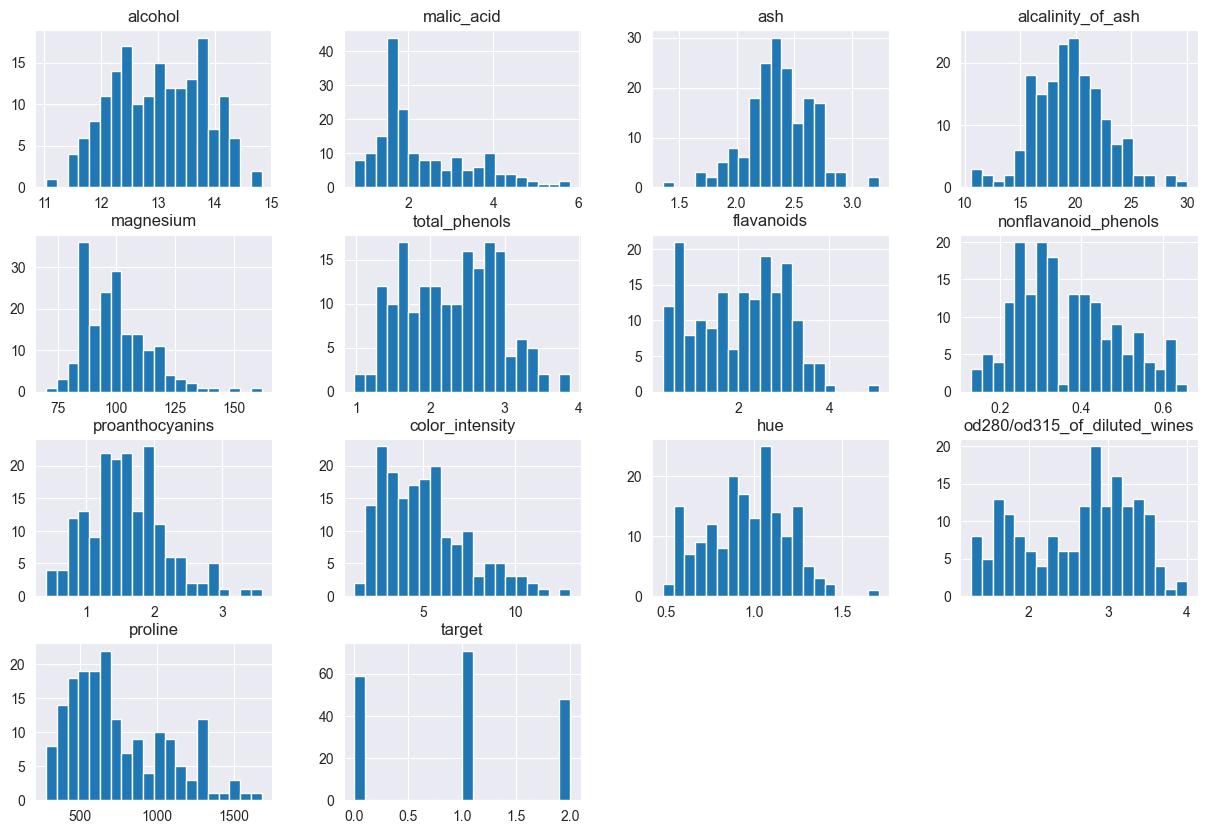

In [16]:
wine_data.hist(bins=20, figsize=(15, 10))
plt.show()

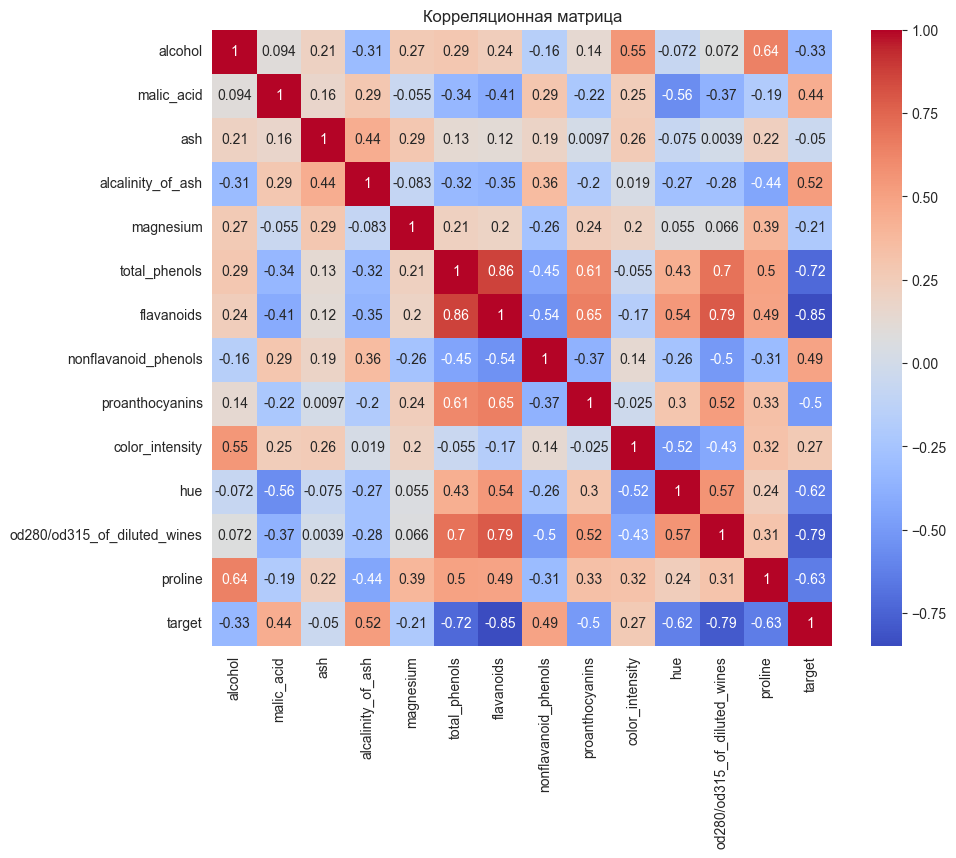

In [17]:
correlation_matrix = wine_data.corr()

# Тепловая карта корреляции
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title("Корреляционная матрица")
plt.show()

In [18]:
X_train, X_test, y_train, y_test = train_test_split(wine_dataset.data, wine_dataset.target, test_size=0.3, random_state=32)
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Точность модели k-NN на наборе данных load_digits: {accuracy * 100:.2f}%')

Точность модели k-NN на наборе данных load_digits: 75.93%


In [19]:
k=3
knn=KNeighborsClassifier(n_neighbors=k)
knn.fit(X_train, y_train)
y_pred=knn.predict(X_test)
print(f'Прогноз модели: {y_pred}')

Прогноз модели: [1 1 0 1 2 0 0 2 0 0 1 2 0 0 0 1 0 2 0 0 1 0 1 0 1 2 0 1 0 0 1 0 2 1 1 1 2
 0 2 1 0 2 0 2 0 0 0 2 0 2 1 1 1 1]


In [20]:
from sklearn.metrics import precision_score, recall_score, f1_score

# Вычисляем точность, полноту и F1-меру
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print(f'Точность: {precision:.2f}')
print(f'Полнота: {recall:.2f}')
print(f'F1-мера: {f1:.2f}')

Точность: 0.76
Полнота: 0.76
F1-мера: 0.75


<h2/>Breast cancer<h2>

In [21]:
from sklearn.datasets import load_breast_cancer
import pandas as pd

In [22]:
breast_cancer=load_breast_cancer()
print(breast_cancer['DESCR'][:1000]+'\n...')

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 0 is Mean Radi

In [23]:
X_train, X_test, y_train,y_test=train_test_split(breast_cancer.data, breast_cancer.target, test_size=0.3, random_state=32)
print("Форма массива X_train: {}".format(X_train.shape))
print("Форма массива y_train: {}".format(y_train.shape))

Форма массива X_train: (398, 30)
Форма массива y_train: (398,)


In [24]:
print("Форма массива X_test: {}".format(X_test.shape))
print("Форма массива y_train: {}".format(y_test.shape))

Форма массива X_test: (171, 30)
Форма массива y_train: (171,)


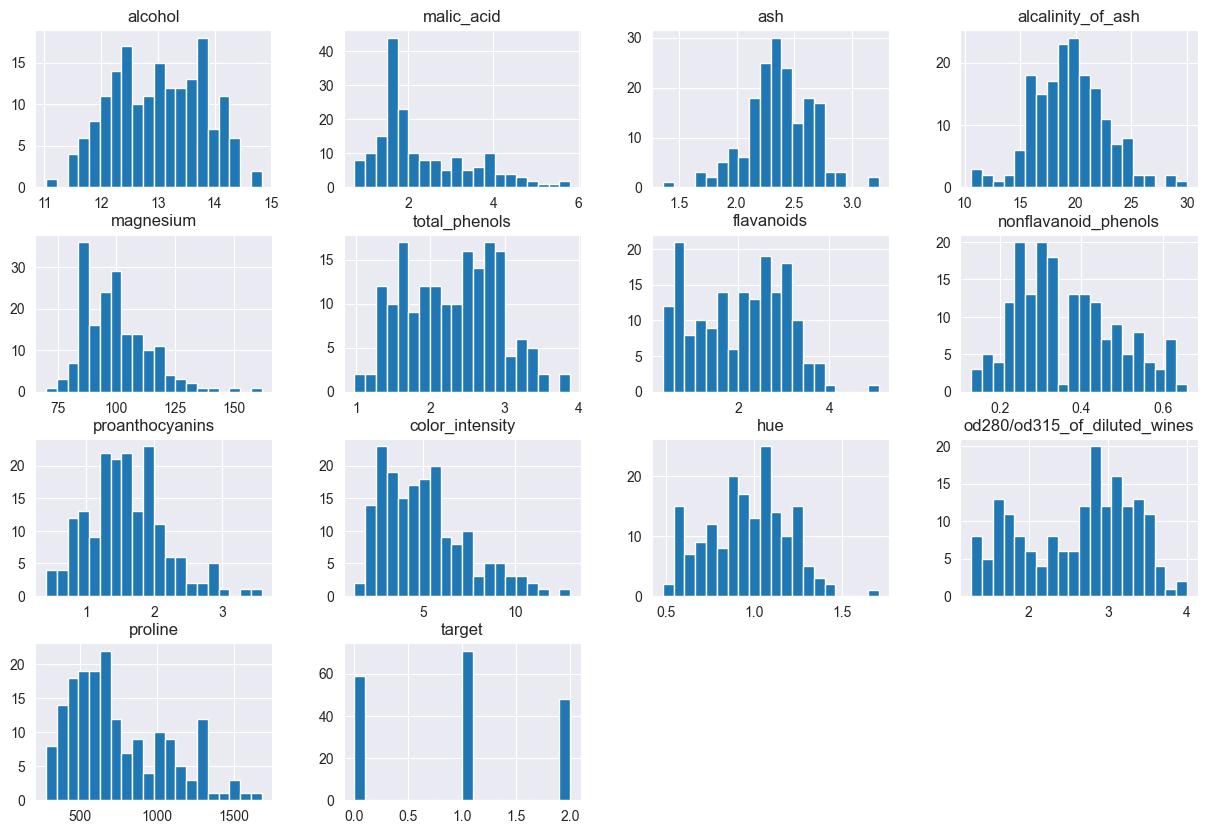

In [25]:
# breast_cancer_dataframe=pd.DataFrame(X_train, columns=breast_cancer.feature_name)
# grr=pd.plotting.scatter_matrix(breast_cancer_dataframe, c=y_train, figsize=(15,15), marker='o',
#                                hist_kdws={'bins': 20}, s=60, alpha=.8)
cancer_data = pd.concat([X, y], axis=1)
cancer_data.hist(bins=20, figsize=(15, 10))
plt.show()


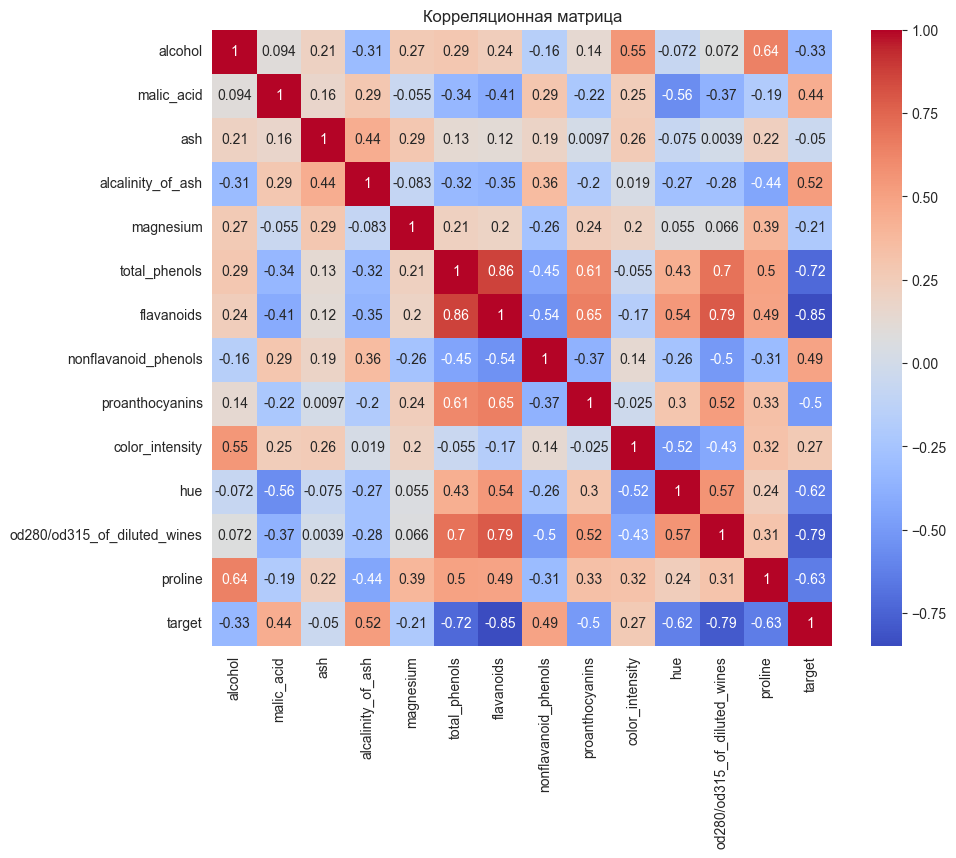

In [26]:
correlation_matrix = cancer_data.corr()

# Тепловая карта корреляции
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title("Корреляционная матрица")
plt.show()

In [27]:
plt.show()
X_train, X_test, y_train, y_test = train_test_split(breast_cancer.data, breast_cancer.target, test_size=0.3,
                                                    random_state=32)
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Точность модели k-NN на наборе данных breast_cancer: {accuracy * 100:.2f}%')

Точность модели k-NN на наборе данных breast_cancer: 90.64%


In [28]:
k=3
knn=KNeighborsClassifier(n_neighbors=k)
knn.fit(X_train, y_train)
y_pred=knn.predict(X_test)
print(f'Прогноз модели: {y_pred}')

Прогноз модели: [1 1 1 0 1 1 1 1 0 0 1 0 1 1 1 1 0 0 0 0 1 0 0 0 1 1 1 0 1 1 0 1 1 1 1 0 0
 1 1 0 1 0 0 1 0 1 1 0 1 1 1 1 1 1 0 1 1 0 0 0 1 1 0 1 1 1 1 0 1 1 1 0 1 1
 1 0 1 0 1 1 0 1 1 1 1 0 1 0 0 0 1 0 1 1 1 1 1 1 1 1 0 1 1 1 0 1 0 1 0 1 1
 1 1 0 0 0 0 0 1 0 0 1 0 0 1 1 0 1 1 1 1 1 1 0 1 1 0 1 1 1 1 0 1 0 1 1 1 0
 1 1 1 1 0 1 0 1 0 0 1 1 0 1 1 0 0 0 1 1 1 1 1]


In [29]:
from sklearn.metrics import precision_score, recall_score, f1_score

# Вычисляем точность, полноту и F1-меру
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print(f'Точность: {precision:.2f}')
print(f'Полнота: {recall:.2f}')
print(f'F1-мера: {f1:.2f}')

Точность: 0.91
Полнота: 0.91
F1-мера: 0.91
